# Project I - Chem 273
## Finite Differences, Random Numbers and Simulation

**1) Motivation**

In the previous modules you have learned how to generate random numbers, how to perform integration and differentiation numerically and also how to perform useful matrix operations.<bf>
You are ready now to run our first project that requires all of your newly gained knowledge!<br> 
In this assignment, we want you to practice how to model differential operators like the Laplace operator numerically using finite differences in order to simulate a diffusion model that explains the formation of fur pattern. 

**2) Preparation**

Compile and run the code *Diffusion2D.py* from the lecture in module 4.<br>
Try to understand what the code does conceptionally!

The **__init__** method initializes the class *Diffusion2D*. It essentially sets up the matrices needed for the simulation. Once *Diffusion2D* has been initialized you can run the actual simulation. The structure is similar to what you have might seen in python already, when you fit data to a model. You first initialize the model:<br>
<br>
My_Model = LinearFit(some fit parameter)<br>
and then run the actual fit<br>
Result   = My_Model.fit(MyData)<br>
<br>
In order to be able to use the variables which have been initialized in the **__init__** method in the **RunSimulation** method, we need to make them accesible via *self*.<br>
Check out:

**3) Exercise**

We now want to run a more complex model that describes how fur pattern or skin pattern on vertebrates emerge due to diffusion reactions. These equations contain a diffusion term $\frac{\partial }{\partial t}c = \Delta c$ and terms that describe the chemical reaction between different chemical compounts.<br>
A particularly interesting paper is the work of *A. J. Koch and H. Meinhardt Biological pattern formation: from basic mechanisms to
complex structures, Rev. Mod. Phys. 66, 1481, 1994* that also shows the numerical details about the simulation.<br>

As a first step, take the code from above and replace the lines which are refering to $C(x,y,t)$ by the following equations:<br>
<br>
$\frac{\partial}{\partial t}a = D_a\, \Delta a + \rho_a \left[\frac{s\,a^2}{1+ \kappa_a\,a^2}   - a\right]$<br>
<br>
$\frac{\partial}{\partial t}s = D_s\, \Delta s + \frac{\sigma_s}{1+ \kappa_s\,y} - \frac{\rho_s\, s\,a^2}{1+ \kappa_a\,a^2} - \mu_s\,s $<br>
<br>
$\frac{\partial}{\partial t}y = \frac{\rho_y\, y^2}{1+ \kappa_y\,y^2} - \mu_y\,y - \sigma_y\,a$<br>

Next, initialize the matrices for *a*, *s* and *y* in the **__init__** as follows:

In [ ]:
A = np.zeros((Lx,Ly,Lt))
S = 3*np.ones((Lx,Ly,Lt))
Y = np.zeros((Lx,Ly,Lt))

and plant "seeds" for the diffusion process for *A*.<br>
<br>
Finally, implement the set of constants in the **__init__** needed for generating **cheetah fur**:

In [ ]:
self.Da     = 0.01
self.Ds     = 0.1
self.rhoa   = 0.05
self.rhos   = 0.0035
self.rhoy   = 0.03
self.mus    = 0.003
self.muy    = 0.003
self.sigs   = 0.0075
self.sigy   = 0.00007
self.ka     = 0.5
self.ks     = 0.3
self.ky     = 22

After running the simulation, you should expect to see the following results:

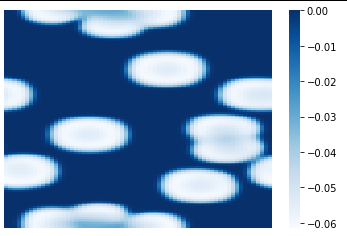
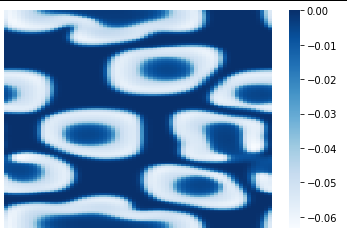
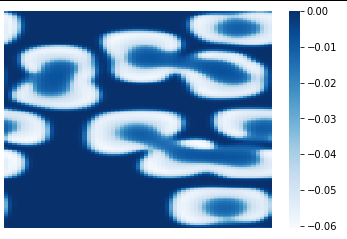

Note: you might need to experiment with the initial conditions for *S* and *A*:<br> 
 - Choose values between 2 and 5.<br>
 - add different noise levels, like e.g.<br>

In [ ]:
A[:,:,0] = 0.01*np.random.rand(Lx,Ly)
S[:,:,0] += 0.01*np.random.rand(Lx,Ly)
Y[:,:,0] = 0.01*np.random.rand(Lx,Ly)

In [14]:
#Import necessary libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:


class Diffusion2D():
    
    def __init__(self):
        
        #define grids
        Lx = 100
        Ly = 100
        Lt = 2500
                
        #Given-- C = 3*np.ones((Lx,Ly,Lt))

        #initialize matrices for a, s, and y
        
        #A acts as activator--promotes production of A and S
        A = np.zeros((Lx,Ly,Lt))
        #S is the substrate-- consumed during reaction (faster rate of diffusion than A)
        S = 3*np.ones((Lx,Ly,Lt))
        #stabilizes the reaction by dampening production of A
        Y = np.zeros((Lx,Ly,Lt))


        #set initial noise as given
        A[:,:,0] = 0.1*np.random.rand(Lx,Ly)
        S[:,:,0] += 0.1*np.random.rand(Lx,Ly)
        Y[:,:,0] = 0.01*np.random.rand(Lx,Ly) 
        ########### 

        #adding up to 12 "seeds" at random locations
        N = round(12*np.random.rand())
        for n in range(N):
            A[int(Lx*np.random.rand()), int(Ly*np.random.rand()),0] = 500 #ADDED - changed C to A
            
        #Given-- self.C = C

        #self variables
        #store arrays as attributes
        self.A = A
        self.S = S
        self.Y = Y
        
        
        self.Lx = Lx
        self.Ly = Ly
        self.Lt = Lt

        #given constants for cheetah fur pattern
        self.Da     = 0.01
        self.Ds     = 0.1
        self.rhoa   = 0.05
        self.rhos   = 0.0035
        self.rhoy   = 0.03
        self.mus    = 0.003
        self.muy    = 0.003
        self.sigs   = 0.0075
        self.sigy   = 0.00007
        self.ka     = 0.5
        self.ks     = 0.3
        self.ky     = 22
        
        
        
    def RunSimulation(self):
        
        #Given-- C = self.C

        #use to call back arrays
        A = self.A
        S = self.S
        Y = self.Y
        
        #plot  heatmap
        #changed C to A
        sns.heatmap(A[:,:,0], cbar = True, cmap="Blues",
                    xticklabels = False, yticklabels = False) 
        plt.title("Initial Concentration")
        plt.show()

        for k in range(1, self.Lt-1):
            for j in range(self.Ly):
        
                jrun_up   = j
                jrun_down = j
         
                #cyclic BCs y direction----------------------------------------------------
                if j+1> self.Ly-1:
                    jrun_up = -1
                
                if j-1 == -1:
                    jrun_down = self.Ly - 1
                #--------------------------------------------------------------
        
                for i in range(self.Lx):
                    
                    irun_up   = i
                    irun_down = i
                
                    #cyclic BCs x direction----------------------------------------------------
                    if i+1>self.Lx-1:
                        irun_up = -1
                        
                    if i-1 == -1:
                        irun_down = self.Lx - 1
                    #--------------------------------------------------------------
                     #Given-- C[i,j,k] = 2*D*(C[irun_up + 1, j  , k - 1] + C[irun_down - 1, j ,k - 1] +\
                                    #C[i, jrun_up + 1  , k - 1] - 4*C[i, j, k - 1] +\
                                    #C[i, jrun_down - 1, k - 1]) +\
                                    #C[i, j, k - 1]

                    
                    #separated it this way because we were getting warning?
                    #in A and S equations below, (self.da*lap_A) is diffusion for A and (self.ds*lap_S) is diffusion for S
                    ##first laplace operator, then defined a,s,y (current values) and directly combined diffusion and reaction in equations below
                    
                    
                     
                    #calculate Laplacian for A
                    lap_A = (
                        A[irun_up + 1, j, k - 1] + A[irun_down - 1, j, k - 1] +
                        A[i, jrun_up + 1, k - 1] + A[i, jrun_down - 1, k - 1] - 
                        4*A[i, j, k - 1]
                            )
                    
                    #calculate Laplacian for S
                    lap_S = (
                        S[irun_up + 1, j, k - 1] + S[irun_down - 1, j, k - 1] +
                        S[i, jrun_up + 1, k - 1] + S[i, jrun_down - 1, k - 1] - 
                        4*S[i, j, k - 1]
                        )

                    #
                    a = A[i, j, k - 1]
                    s = S[i, j, k - 1]
                    y = Y[i, j, k - 1] 
                    


                    A[i,j,k] = (
                        A[i,j,k-1] + self.Da * lap_A + self.rhoa * ((s * a**2) / (1 + self.ka * a**2) - a)
                    )
                    
                
                    S[i,j,k] = (
                        S[i,j,k-1] + self.Ds * lap_S + self.sigs / (1 + self.ks * y) - (self.rhos * s * a**2) / (1 + self.ka * a**2) - self.mus * s
                        )
                    
                
                    Y[i,j,k] = (Y[i,j,k-1] + (self.rhoy * y**2) / (1 + self.ky * y**2)- self.muy * y - self.sigy * a
                        )     
 

            #plot
            if not k % 250:

                #changed C to A
                sns.heatmap(A[:,:,k], cbar = True , cmap="Blues",
                            xticklabels = False, yticklabels = False)

                plt.title(f'Concentration at t={k}')
                plt.show()

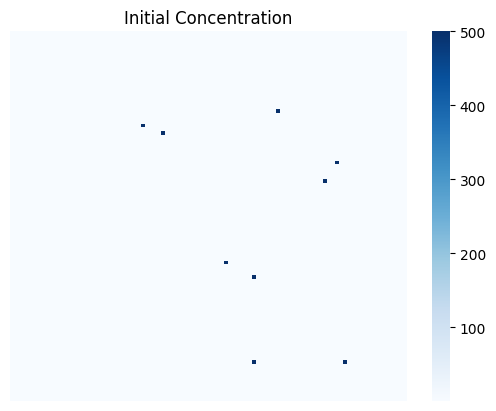

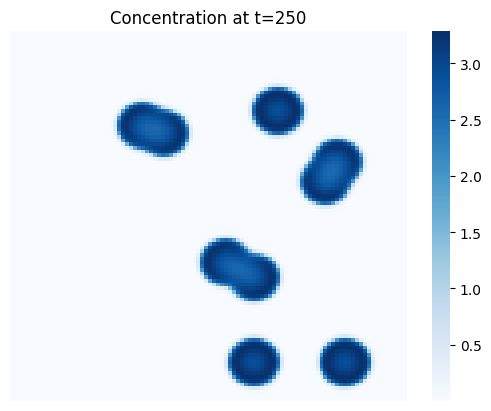

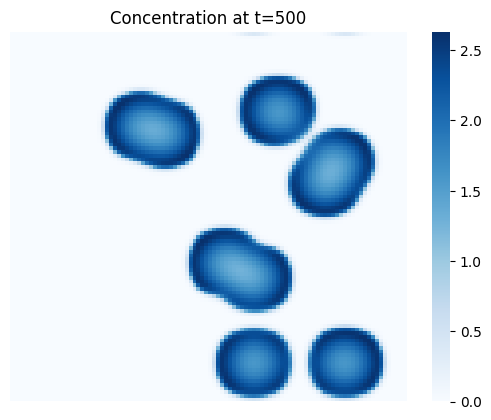

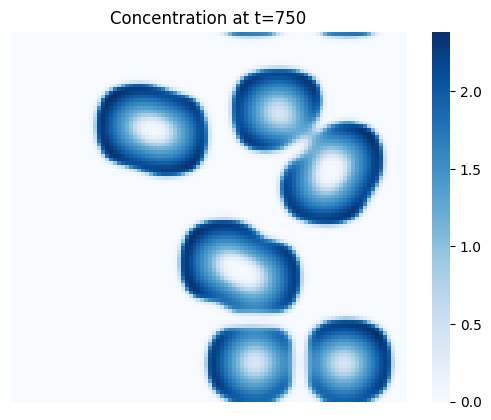

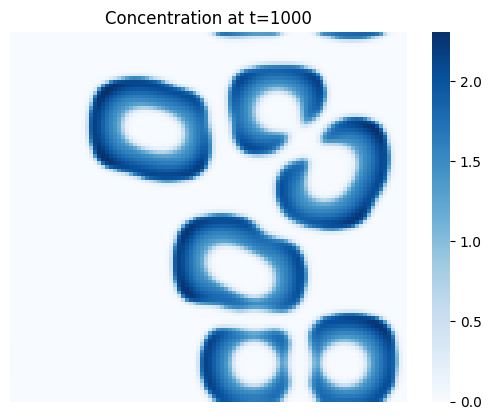

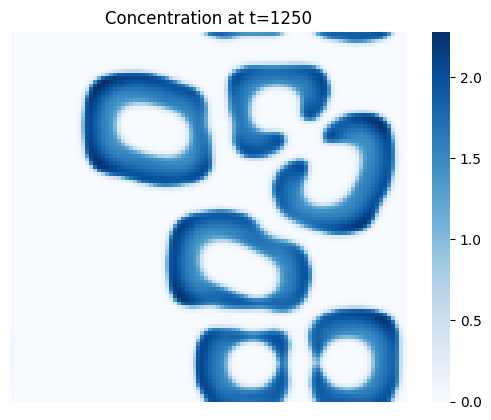

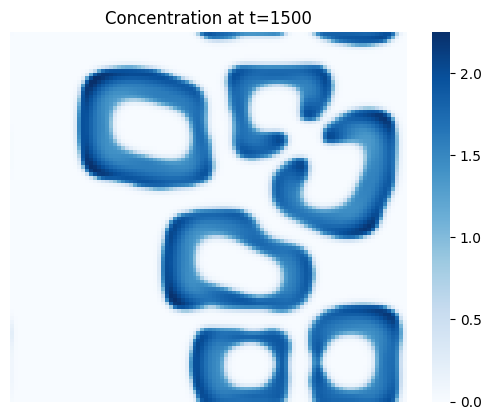

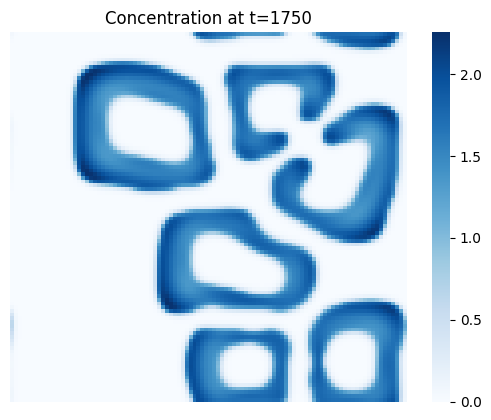

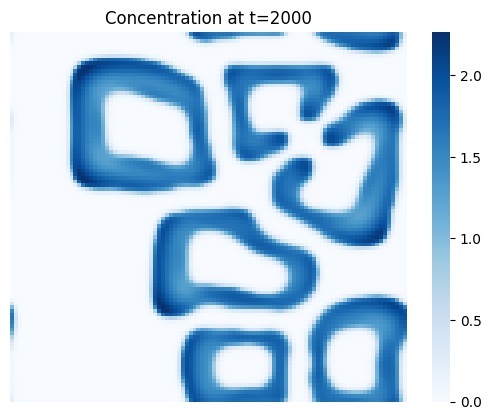

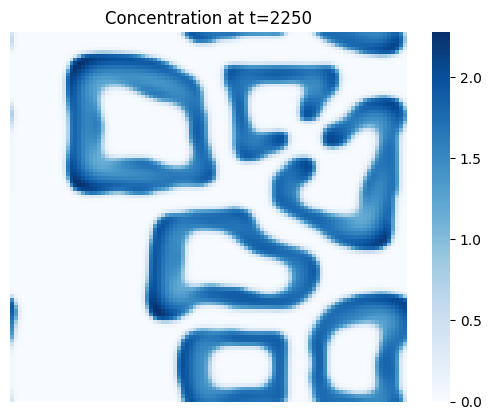

In [31]:
D = Diffusion2D()
D.RunSimulation()

How do the pattern change?

The fur patterns emerge due to the contrast between the activator (A) and substrate (S) reacting with each other and diffusing.
Changing the initial conditions for S and A represents adjusting the initial concentration in each of the seeds. Since the whole reaction depends on the interplay between the activator (producing seeds) and the substrate (consuming seeds), changing the initial A and S values affects the reaction and therefore the patterns that emerge greatly. The rate of the reaction and seed concentration have a direct relationship -- increasing the seed concentration causes the rate of reaction to also increase. Similarly, lowering the seed concentrations causes the rate of reaction to decrease. The heatmaps over time visualize this impact by showing the spots forming quickly and consequently dispersing quickly for high initial seed concentrations (i.e. high rates of diffusion). The spots form more slowly for lower initial seed concentrations. Additionally, larger spots are formed by larger initial seed concentrations, and smaller spots are formed by smaller initial seed concentrations.
Note: while initial concentration impacts the rate of reaction, the rate of diffusion is controlled separately by the diffusion constants (Da, Ds). High concentrations amplify reaction terms like 
a^2
 , which increases local contrast, making diffusion effects more visible faster.

The final fur pattern can also be impacted through adjusting the diffusion constants. Small adjustments will cause subtle differences in the spot shape and pattern but large adjustments can completely throw off the activator/substrate balance and, because reactions occur in such delicate balance, these adjustments can cause the fur pattern to be lost completely and have no defined features.

Adjusting the noise parameters will also impact the output of the simulation. The noise needs to be in balance to show the fur pattern correctly. Increasing the initial noise will cause the fur pattern to have fewer and ultimately no defined features. A precise initial noise level is important for our expected spots to emerge. Lowering the noise may increase symmetry in the pattern to the point where it no longer looks like true fur spots.